In [2]:
import numpy as np
import pandas as pd
import urllib
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
my_page = 'https://www.quora.com/profile/Bassim-Eledath-1'
page = urllib.request.urlopen(my_page)
soup = BeautifulSoup(page, 'html.parser')

In [4]:
links = soup.find_all('a', href=True)
list_questions = []
for link in links:
    list_questions.append(link['href'])

In [5]:
my_stats = []
numbers = []
labels = []
for x in soup.find_all('a',href=True):
    if x.find_all('span', {'class' : 'list_count'})!=[]:
        my_stats.append(x.text)
        
for x in my_stats:
    numbers.append(re.findall('\d+', x ))
numbers = [int(item) for sublist in numbers for item in sublist]
for x in my_stats:
    word = ''.join([i for i in x if not i.isdigit()])
    labels.append(word)


In [6]:
# formatting 
questions = []
knows_about = []
for x in list_questions:
    if x.find('#') == -1:
        if x.find('profile') == -1:
            if x.find('api') == -1:
                x = x.replace('/','')
                x = x.replace('-',' ')
                x = x.replace('Bassim Eledath','')
                x = x.replace('answer 1','')
                if x.startswith('topic'):
                    x = x.replace('topic','')
                    x = x.replace(' 1','')
                    x = x.replace(' 1','')
                    knows_about.append(x)
                else:
                    questions.append(x)


In [7]:
questions  = [x for x in questions if x not in ['','about', 'careers', 'aboutprivacy', 'abouttos','contact']]
knows_about = list(set(knows_about))
page_title = soup.title.string
answers = [x.text for x in soup.find_all('p')]

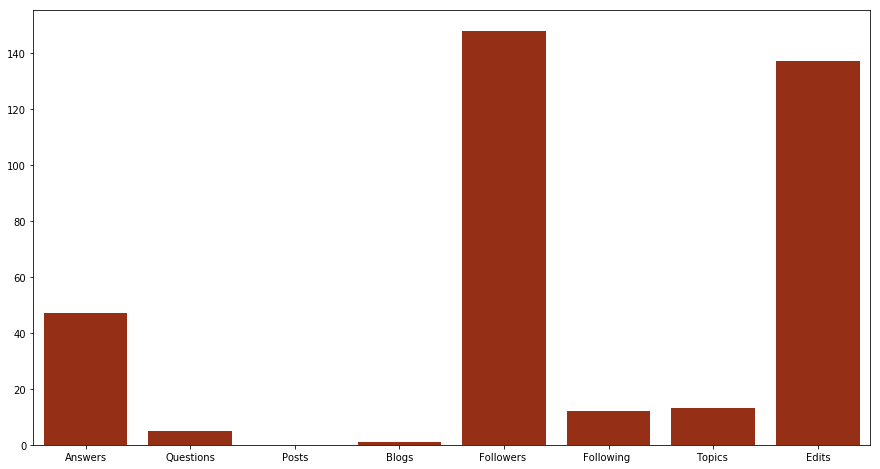

In [8]:
plt.figure(figsize=(15,8))
sns.barplot(x=labels,y=numbers,color='#AA2200')


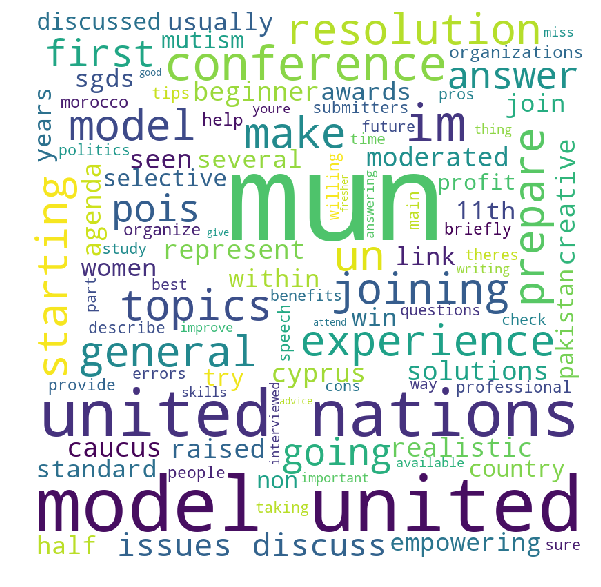

In [10]:
# wordcloud of questions
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in questions: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

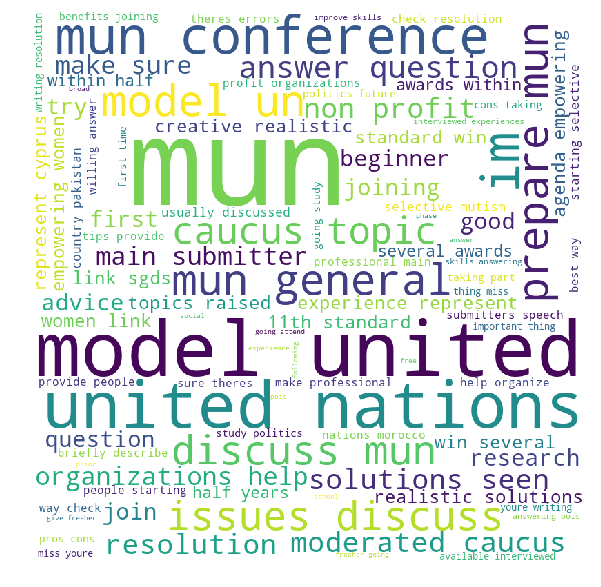

In [258]:
# wordcloud of answers 

for val in answers: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()